<a href="https://colab.research.google.com/github/taremwatadeo/Artificial-Intelligence/blob/master/Cat2_nov2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#NAME: TAREMWA TADEO
#SID: 216-319

import pandas as pd
import numpy as np

In [ ]:
# answer 1
df =pd.read_csv('/content/Kampala1.csv', encoding = 'latin1')
df.head()

,Unnamed: 0,station_ID,Date,Time,Day,Month,Year,TC,TdC,Hr,ddd,ffkmh,Precmm,Prechrs,Nt,Nh,HKm,Viskm
0,2,63680,31/12/2021 06:00,06:00:00,31,12,2021,18.0,17.7,98,CAL,0.0,22.0/24h,24h,8,6.0,0.3,5
1,3,63680,30/12/2021 09:00,09:00:00,30,12,2021,23.8,18.9,74,CAL,0.0,0.0/3h,3h,7,4.0,0.6,7
2,4,63680,28/12/2021 09:00,09:00:00,28,12,2021,23.4,18.3,73,CAL,0.0,0.0/3h,3h,7,2.0,0.3,6
3,5,63680,28/12/2021 06:00,06:00:00,28,12,2021,23.4,18.3,73,CAL,0.0,0.0/24h,24h,7,2.0,0.3,6
4,6,63680,25/12/2021 12:00,12:00:00,25,12,2021,21.5,19.3,87,CAL,0.0,4.0/6h,6h,8,5.0,0.3,7


In [ ]:
# answer 2
#Replace values in column ddd with given values
df.replace('CAL',0, inplace=True)
df.replace('N',360, inplace=True)
df.replace('NNE',22.5, inplace=True)
df.replace('NE',45.0, inplace=True)
df.replace('ENE',67.5, inplace=True)
df.replace('E',90.0, inplace=True)
df.replace('ESE',112.5, inplace=True)
df.replace('SE',135.0, inplace=True)
df.replace('SSE',157.5, inplace=True)
df.replace('S',180.0, inplace=True)
df.replace('SSW',202.5, inplace=True)
df.replace('SW',225.0, inplace=True)
df.replace('WSW',247.5, inplace=True)
df.replace('W',270.0, inplace=True)
df.replace('WNW',292.5, inplace=True)
df.replace('NW',315.0, inplace=True)
df.replace('NNW',337.5, inplace=True)

<ipython-input-121-cddd0050058d>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('NNW',337.5, inplace=True)


In [ ]:
# answer 3
#turning Column “ Precmm” to numeric values.
Newdataframe = df.replace(['/24h','/18h','/15h','/6h','/3h','/12h','/2h', '/1h'],['','','','','','','',''], regex=True)


In [ ]:
# answer no 4 turning colum "prechrs" to numeric value
four = Newdataframe.replace('h','', regex=True)


In [ ]:
# answer no 5
four.head()

,Unnamed: 0,station_ID,Date,Time,Day,Month,Year,TC,TdC,Hr,ddd,ffkmh,Precmm,Prechrs,Nt,Nh,HKm,Viskm
0,2,63680,31/12/2021 06:00,06:00:00,31,12,2021,18.0,17.7,98,0.0,0.0,22.0,24,8,6.0,0.3,5
1,3,63680,30/12/2021 09:00,09:00:00,30,12,2021,23.8,18.9,74,0.0,0.0,0.0,3,7,4.0,0.6,7
2,4,63680,28/12/2021 09:00,09:00:00,28,12,2021,23.4,18.3,73,0.0,0.0,0.0,3,7,2.0,0.3,6
3,5,63680,28/12/2021 06:00,06:00:00,28,12,2021,23.4,18.3,73,0.0,0.0,0.0,24,7,2.0,0.3,6
4,6,63680,25/12/2021 12:00,12:00:00,25,12,2021,21.5,19.3,87,0.0,0.0,4.0,6,8,5.0,0.3,7


In [ ]:
missingdata = four.isnull().sum()
missingdata

,0
Unnamed: 0,0
station_ID,0
Date,0
Time,0
Day,0
Month,0
Year,0
TC,0
TdC,0
Hr,0


In [ ]:
# answer no 6 and 7
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [ ]:
four['Date'] = pd.to_datetime(four['Date']) # Convert the column to datetime objects

# Extract features from the datetime column
four['Year'] = four['Date'].dt.year
four['Month'] = four['Date'].dt.month
four['Day'] = four['Date'].dt.day
# four['Time'] = four['Date'].dt.time
four['Time'] = four['Date'].dt.hour * 3600 + four['Date'].dt.minute * 60 + four['Date'].dt.second

X = four.drop(['ddd','Precmm','Prechrs','Nh','HKm','Date'], axis=1)  #Dropped colomns with missing values
Y = four['ddd']




In [ ]:
#four['Prechrs'] = pd.to_numeric(four['Prechrs'].replace('Tr', 0), errors='coerce')
for column in four.select_dtypes(include=['object']).columns:
    four[column] = pd.to_numeric(four[column].replace('Tr', 0), errors='coerce')
# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Machine": SVR(),
    "Neural Network": MLPRegressor(random_state=42, max_iter=500),
    "Lasso": Lasso(random_state=42),
   # "Linear Regression": LinearRegression(),
   # "Decision Tree": DecisionTreeRegressor(random_state=42)

}

# Initialize lists to store results
mae_scores = []
rmse_scores = []
r2_scores = []



In [ ]:
# Train each model and compute metrics
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)


    # Calculate MAE (Mean Absolute Error)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # Calculate R² (coefficient of determination)
    r2 = r2_score(y_test, y_pred)

    # Append results
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)


# Create a DataFrame to store the results
metrics_df = pd.DataFrame({
    "Model": list(models.keys()),
    "MAE": mae_scores,
    "RMSE": rmse_scores,
    "R²": r2_scores
})

# Print the results table
print(metrics_df)



                    Model        MAE       RMSE        R²
0           Random Forest  22.359653  45.384097  0.760342
1       Gradient Boosting  25.850694  47.894446  0.733096
2  Support Vector Machine  88.667826  97.095502 -0.096941
3          Neural Network  73.953425  86.563631  0.128122
4                   Lasso  45.499564  59.085516  0.593793


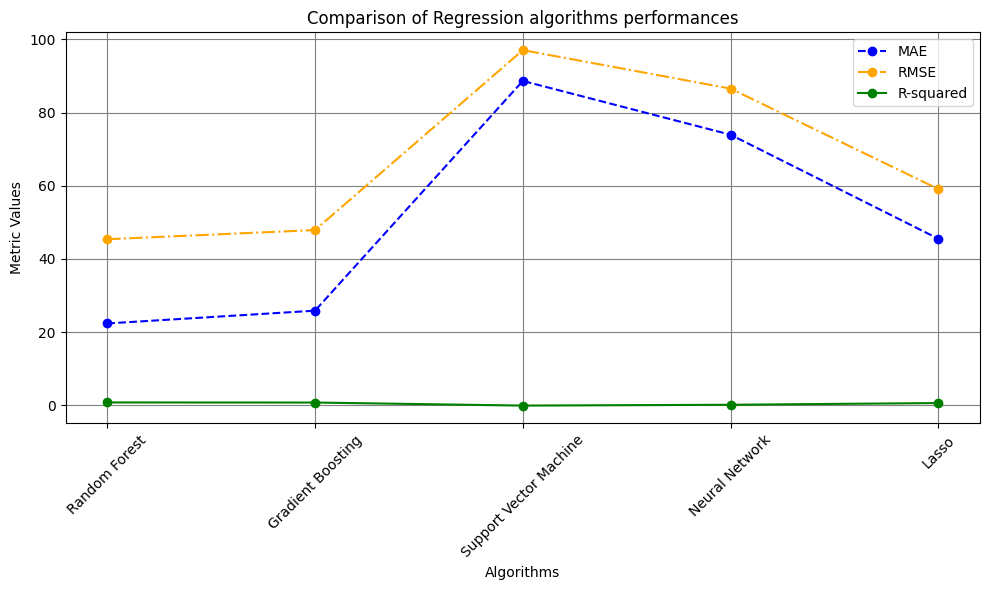

In [ ]:
# Plot the results as a line graph with variables (R-squared, MAE, RMSE) on the y-axis
plt.figure(figsize=(10, 6))

# Plot R-squared, MAE, and RMSE for each model
plt.plot(metrics_df['Model'], metrics_df['MAE'], label="MAE", marker='o', linestyle='--', color='blue')
plt.plot(metrics_df['Model'], metrics_df['RMSE'], label="RMSE", marker='o', linestyle='-.', color='orange')
plt.plot(metrics_df['Model'], metrics_df['R²'], label="R-squared", marker='o', linestyle='-', color='green')


# Add title and labels
plt.title("Comparison of Regression algorithms performances")
plt.xlabel("Algorithms")
plt.ylabel("Metric Values")
plt.xticks(rotation=45)  # Rotate model names for better readability

# Add grid lines
plt.grid(True, which='both', color='gray')

# Add a legend to distinguish the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()